In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This magic command makes plots appear directly in the notebook
%matplotlib inline
# This sets a nice default style for our plots
sns.set_style('whitegrid')

### **Step 1: Load Your Data and Get the "Big Picture"**
We will load the clean feature data you created. The very first thing a quant does is run `.info()` and `.describe()`.

- `info()` is a quick check for data types and missing values.
- `describe()` gives you the statistical summary (mean, median, min, max) of every feature. This is your first look at the data's scale and central tendencies.

In [3]:
df_features = pd.read_parquet('../data/processed/hyp_a_features_xauusd_h1_2018_present.parquet')

print("--- Data Info ---")
df_features.info()

print("\n--- Statistical Summary ---")
df_features.describe()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1984 entries, 2018-01-15 to 2025-09-19
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day_of_week        1984 non-null   int64  
 1   asia_return        1984 non-null   float64
 2   asia_range         1984 non-null   float64
 3   atr_at_asia_close  1984 non-null   float64
 4   rsi_at_asia_close  1984 non-null   float64
 5   ema50_dist         1984 non-null   float64
 6   ema200_dist        1984 non-null   float64
 7   london_direction   1984 non-null   int64  
 8   london_return      1984 non-null   float64
 9   timeframe          1984 non-null   object 
 10  symbol             1984 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 186.0+ KB

--- Statistical Summary ---


,day_of_week,asia_return,asia_range,atr_at_asia_close,rsi_at_asia_close,ema50_dist,ema200_dist,london_direction,london_return
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000
mean,1.993952,0.000267,11.356996,4.518604,51.202838,0.000589,0.002272,0.515625,0.000047
std,1.410988,0.003702,9.861232,2.673625,11.527859,0.005921,0.012700,0.499882,0.005920
min,0.000000,-0.022790,1.410000,1.098705,19.501718,-0.045977,-0.065987,0.000000,-0.050228
25%,1.000000,-0.001609,5.655000,2.855786,43.079767,-0.002707,-0.005006,0.000000,-0.002723
50%,2.000000,0.000240,8.550000,3.965926,51.071582,0.000371,0.001727,1.000000,0.000189
75%,3.000000,0.002105,13.172500,5.414047,59.162589,0.003724,0.008939,1.000000,0.003183
max,4.000000,0.019525,84.940000,27.238223,87.245245,0.029182,0.068745,1.000000,0.027751


### **Step 2: Understanding Your Features (Univariate Analysis)**

Now we look at each feature one by one. The best tool for this is a histogram or KDE plot.

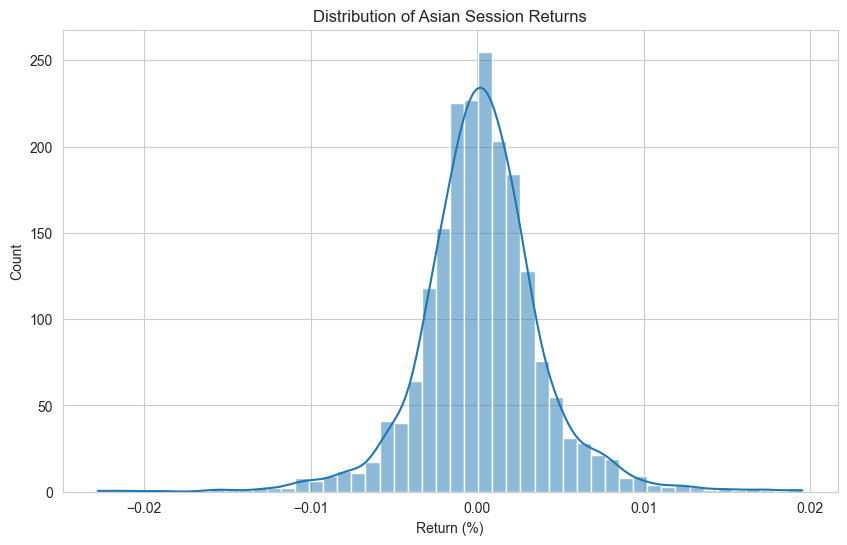

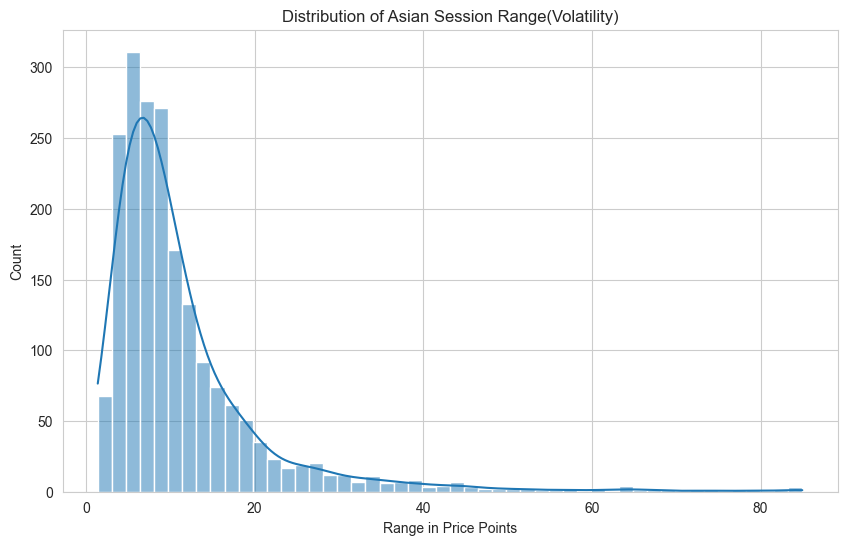

In [4]:
# Let's look at the distribution of the Asian session return
plt.figure(figsize=(10, 6))
sns.histplot(df_features['asia_return'], kde=True, bins=50)
plt.title('Distribution of Asian Session Returns')
plt.xlabel('Return (%)')
plt.show()

# distribution of asian range
plt.figure(figsize=(10, 6))
sns.histplot(data=df_features['asia_range'], kde=True, bins=50)
plt.title('Distribution of Asian Session Range(Volatility)')
plt.xlabel('Range in Price Points')
plt.show()

### **Step 3: Finding Relationships (Bivariate Analysis)**

This is where we hunt for clues that will help our model.

**Tool 1: The Correlation Matrix Heatmap**

This is the fastest way to see which variables move together.

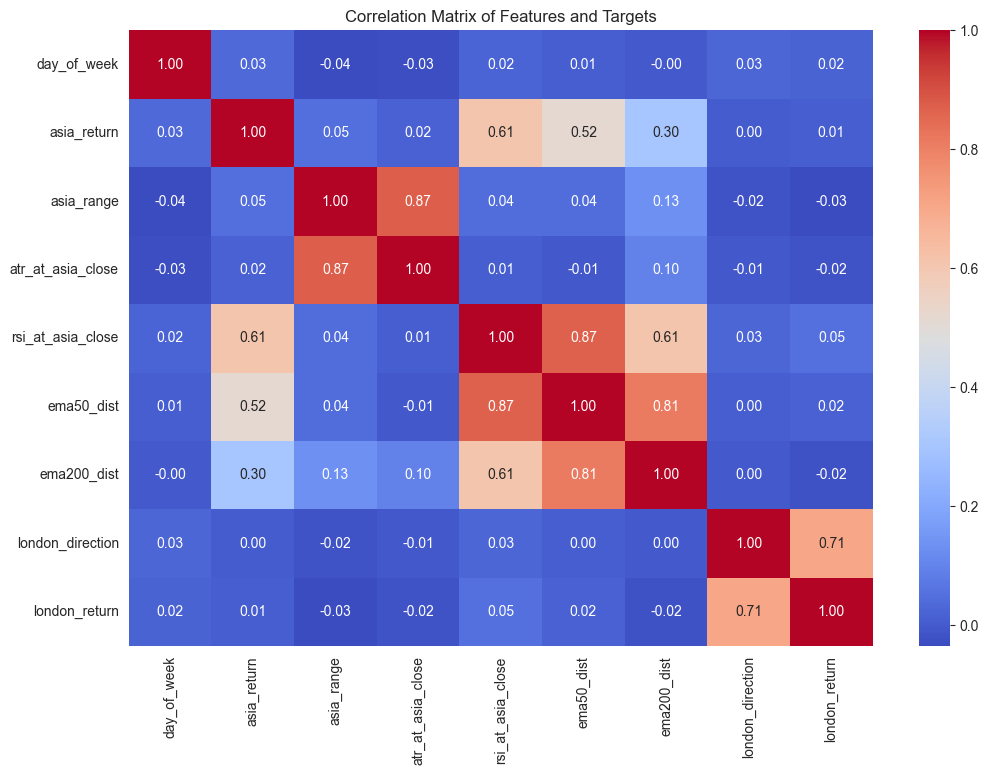

In [21]:
plt.figure(figsize=(12, 8))
# .corr() calulates the correlation between all numberic columns
sns.heatmap(df_features[
    ['day_of_week', 
    'asia_return', 
    'asia_range', 
    'atr_at_asia_close',
    'rsi_at_asia_close', 
    'ema50_dist', 
    'ema200_dist',
    'london_direction',
    'london_return']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Targets')
plt.show()

**Tool 2: The "Money Plot" (Box Plot for Classification)**

This directly visualizes your hypothesis.

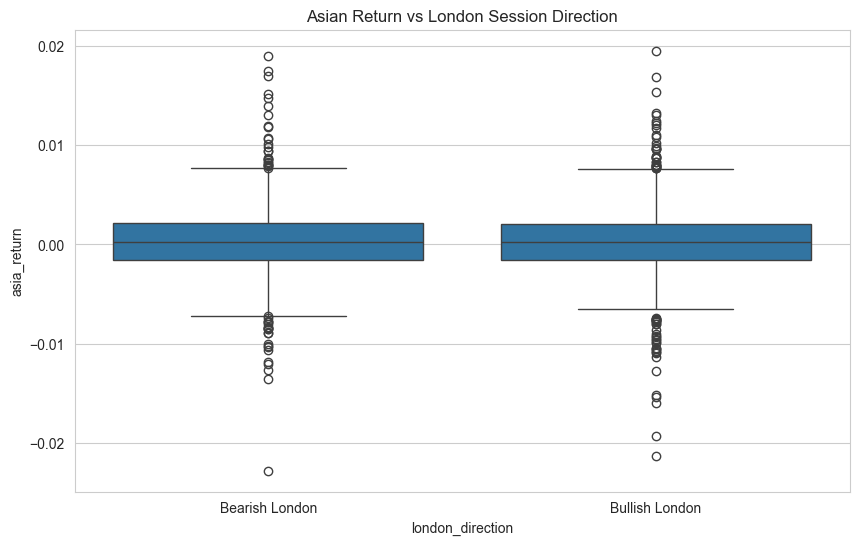

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='london_direction', y='asia_return', data=df_features)
plt.title('Asian Return vs London Session Direction')
plt.xticks([0,1], ['Bearish London', 'Bullish London']) # make labels readable
plt.show()

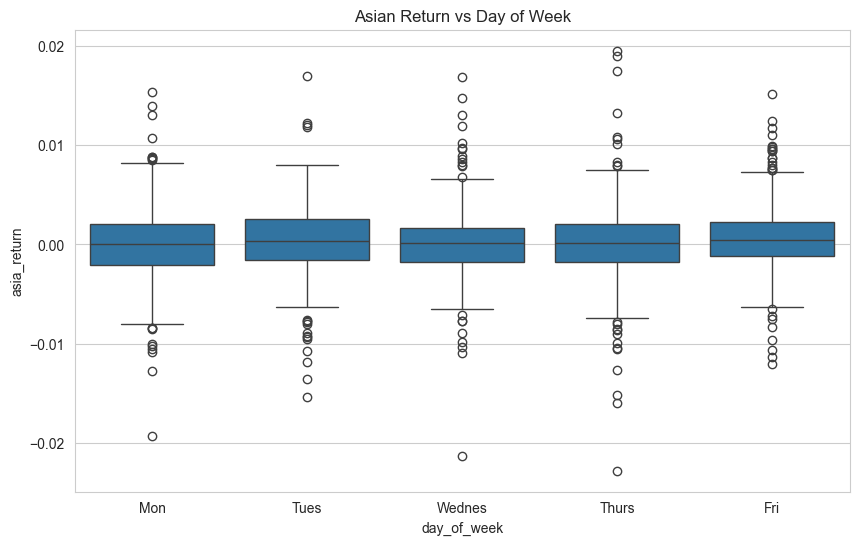

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='asia_return', data=df_features)
plt.title('Asian Return vs Day of Week')
plt.xticks([0,1, 2, 3, 4], ['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri']) # make labels readable
plt.show()